In [ ]:
!pip install torch torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.spatial import distance_matrix

# 1. Load Data from CSV
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# 2. Create Graph Data
def create_graph(df, distance_threshold):
    # Node features: Latitude, Longitude, and Population
    node_features = torch.tensor(df[['Latitude', 'Longitude', 'population']].values, dtype=torch.float)

    # Create edge index based on proximity (using a distance matrix)
    coords = df[['Latitude', 'Longitude']].values
    dist_matrix = distance_matrix(coords, coords)

    # Define edges where the distance between nodes is less than the threshold
    edge_index = np.array(np.where(dist_matrix < distance_threshold))
    edge_index = torch.tensor(edge_index, dtype=torch.long)

    # Create the graph data structure
    graph_data = Data(x=node_features, edge_index=edge_index)
    return graph_data

# 3. GNN Model Definition
class GNNModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # First GCN Layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second GCN Layer
        x = self.conv2(x, edge_index)

        return x

# 4. Train and Test Split (we assume you have separate CSVs for train and test)
train_data = load_data('/content/updated_data_train.csv')
test_data = load_data('/content/updated_data.csv')

# Define a distance threshold for edge creation (e.g., 0.1 degree distance)
distance_threshold = 0.1

# Create graph structures
train_graph = create_graph(train_data, distance_threshold)
test_graph = create_graph(test_data, distance_threshold)

# 5. Training the GNN Model
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)

    # Using population as the target
    target = data.x[:, 2]  # Population field is the target

    # Loss function (MSE for regression)
    loss = criterion(out[:, 2], target)
    loss.backward()
    optimizer.step()
    return loss.item()

# 6. Evaluation Function
def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        target = data.x[:, 2]  # Population field
        pred = out[:, 2]  # Predicted population
        mse = mean_squared_error(target.numpy(), pred.numpy())
        return mse

# Hyperparameters
input_features = 3  # Latitude, Longitude, Population
hidden_features = 16
output_features = 3  # Output the same features

# Initialize model, optimizer, and loss function
model = GNNModel(in_channels=input_features, hidden_channels=hidden_features, out_channels=output_features)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Training loop
epochs = 100
for epoch in range(epochs):
    loss = train(model, train_graph, optimizer, criterion)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Evaluation on the test dataset
mse = evaluate(model, test_graph)
print(f'Test Mean Squared Error: {mse}')


Epoch 0, Loss: 3553919488.0
Epoch 10, Loss: 2360303616.0
Epoch 20, Loss: 1703654912.0
Epoch 30, Loss: 1363285888.0
Epoch 40, Loss: 1303397760.0


KeyboardInterrupt: 

In [3]:
!pip install torch torch-geometric scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.1 MB/s eta 0:00:00


<ipython-input-5-1003b989f8b8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(train_coords[['Latitude', 'Longitude', 'population']])


Epoch 0, Loss: 0.35208818316459656
Epoch 10, Loss: 0.02677580714225769
Epoch 20, Loss: 0.018059976398944855
Epoch 30, Loss: 0.012143171392381191
Epoch 40, Loss: 0.0081762271001935
Epoch 50, Loss: 0.007296369876712561
Epoch 60, Loss: 0.006621309090405703
Epoch 70, Loss: 0.00622634356841445
Epoch 80, Loss: 0.005899776704609394
Epoch 90, Loss: 0.0055914632976055145
Epoch 100, Loss: 0.005306047387421131
Epoch 110, Loss: 0.005045520141720772
Epoch 120, Loss: 0.0048049623146653175
Epoch 130, Loss: 0.004580527078360319
Epoch 140, Loss: 0.004365599248558283
Epoch 150, Loss: 0.004155866801738739
Epoch 160, Loss: 0.0039559160359203815
Epoch 170, Loss: 0.003769530449062586
Epoch 180, Loss: 0.0035934392362833023
Epoch 190, Loss: 0.0034280726686120033
Epoch 200, Loss: 0.003270238172262907
Epoch 210, Loss: 0.003121407236903906
Epoch 220, Loss: 0.0029873945750296116
Epoch 230, Loss: 0.002862434135749936
Epoch 240, Loss: 0.002745115663856268
Epoch 250, Loss: 0.0026335353031754494
Epoch 260, Loss: 0.00

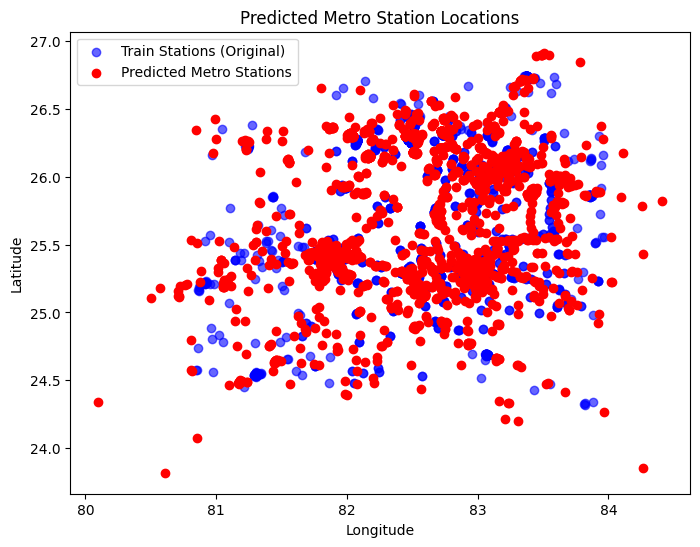

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the train and test data
train_data = pd.read_csv('updated_data_train.csv')
test_data = pd.read_csv('updated_data.csv')

# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(train_coords[['Latitude', 'Longitude', 'population']])

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges between nodes based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        G.add_edge(i, neighbors[j])

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
for edge in G.edges():
    edge_index.append([edge[0], edge[1]])

# Convert node features and edge index to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index)

# Define the GCN model
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16)  # Input: 3 features (Lat, Long, Population)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 2)  # Output: 2 features (Predicted Lat, Long)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = self.conv3(x, edge_index)
        return x

# Initialize the model, loss function, and optimizer
model = GCN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    target = data.x[:, :2]  # Target is Latitude and Longitude (first two features)
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Post-process: Inverse transform (convert back to original scale) the predictions
model.eval()
predicted_positions = model(data).detach().numpy()

# Inverse transform the predictions using the same scaler (for Lat, Long)
predicted_positions = scaler.inverse_transform(
    np.hstack((predicted_positions, np.zeros((predicted_positions.shape[0], 1))))
)[:, :2]  # Only take Lat and Long

# Clip the latitude values to stay within a valid range (Assume 0 to 50)
predicted_positions[:, 0] = np.clip(predicted_positions[:, 0], 0, 50)  # Latitude range

# Plot the original train data and predicted station locations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


<ipython-input-4-61dbe13db95c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


Epoch 0, Loss: 0.32407346367836
Epoch 10, Loss: 0.062002088874578476
Epoch 20, Loss: 0.028544625267386436
Epoch 30, Loss: 0.02262757532298565
Epoch 40, Loss: 0.02065804786980152
Epoch 50, Loss: 0.01808241568505764
Epoch 60, Loss: 0.015458362177014351
Epoch 70, Loss: 0.01279695425182581
Epoch 80, Loss: 0.010651038028299809
Epoch 90, Loss: 0.009141312912106514
Epoch 100, Loss: 0.008204089477658272
Epoch 110, Loss: 0.007457552943378687
Epoch 120, Loss: 0.006646717432886362
Epoch 130, Loss: 0.005663899704813957
Epoch 140, Loss: 0.004630018025636673
Epoch 150, Loss: 0.003793003037571907
Epoch 160, Loss: 0.0031500509940087795
Epoch 170, Loss: 0.0027657239697873592
Epoch 180, Loss: 0.0025544441305100918
Epoch 190, Loss: 0.0024339500814676285
Epoch 200, Loss: 0.002305661328136921
Epoch 210, Loss: 0.002236619358882308
Epoch 220, Loss: 0.0021766729187220335
Epoch 230, Loss: 0.0021184058859944344
Epoch 240, Loss: 0.002063184743747115
Epoch 250, Loss: 0.002088068053126335
Epoch 260, Loss: 0.001969

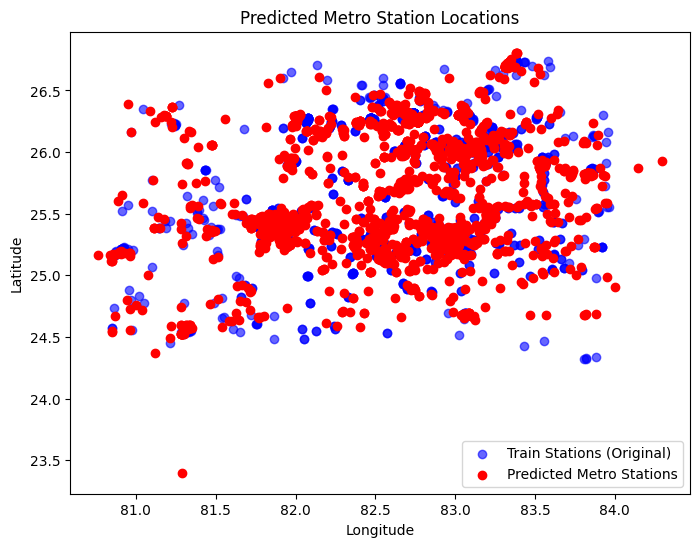

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the train and test data
train_data = pd.read_csv('updated_data_train.csv')
test_data = pd.read_csv('updated_data.csv')

# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        # Compute the absolute difference in population
        population_diff = abs(train_coords['population'].iloc[i] + train_coords['population'].iloc[neighbors[j]])

        # Add the edge with the population difference as weight
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the GCN model
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16)  # Input: 3 features (Lat, Long, Population)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 2)  # Output: 2 features (Predicted Lat, Long)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = self.conv1(x, edge_index, edge_weight=edge_weight)
        x = torch.relu(x)
        x = self.conv2(x, edge_index, edge_weight=edge_weight)
        x = torch.relu(x)
        x = self.conv3(x, edge_index, edge_weight=edge_weight)
        return x

# Initialize the model, loss function, and optimizer
model = GCN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    target = data.x[:, :2]  # Target is Latitude and Longitude (first two features)
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Post-process: Inverse transform (convert back to original scale) the predictions
model.eval()
predicted_positions = model(data).detach().numpy()

# Inverse transform the predictions using the same scaler (for Lat, Long)
predicted_positions = scaler.inverse_transform(
    np.hstack((predicted_positions, np.zeros((predicted_positions.shape[0], 1))))
)[:, :2]  # Only take Lat and Long

# Clip the latitude values to stay within a valid range (Assume 0 to 50)
predicted_positions[:, 0] = np.clip(predicted_positions[:, 0], 0, 50)  # Latitude range

# Plot the original train data and predicted station locations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


<ipython-input-5-ffaf185d43ab>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


Epoch 0, Loss: 0.6929094195365906
Epoch 10, Loss: 0.6924633383750916
Epoch 20, Loss: 0.6921595931053162
Epoch 30, Loss: 0.6915760636329651
Epoch 40, Loss: 0.6912057995796204
Epoch 50, Loss: 0.6904228329658508
Epoch 60, Loss: 0.6888605952262878
Epoch 70, Loss: 0.6913442611694336
Epoch 80, Loss: 0.688965916633606
Epoch 90, Loss: 0.6876312494277954
Epoch 100, Loss: 0.6878782510757446
Epoch 110, Loss: 0.6879092454910278
Epoch 120, Loss: 0.6861783862113953
Epoch 130, Loss: 0.6880599856376648
Epoch 140, Loss: 0.6876180171966553
Epoch 150, Loss: 0.6858112215995789
Epoch 160, Loss: 0.6901506781578064
Epoch 170, Loss: 0.6874329447746277
Epoch 180, Loss: 0.6860225796699524
Epoch 190, Loss: 0.6846182942390442
Epoch 200, Loss: 0.684336245059967
Epoch 210, Loss: 0.6860153675079346
Epoch 220, Loss: 0.693279504776001
Epoch 230, Loss: 0.6923975348472595
Epoch 240, Loss: 0.6923190951347351
Epoch 250, Loss: 0.6906855702400208
Epoch 260, Loss: 0.6905505061149597
Epoch 270, Loss: 0.6914244294166565
Epoch 

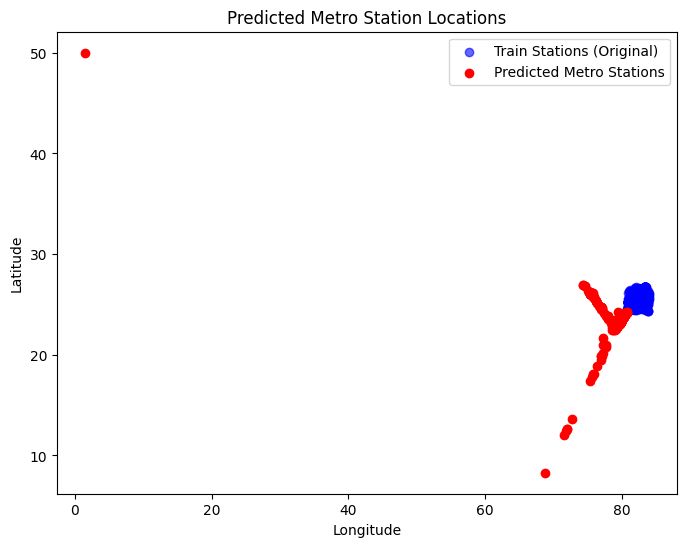

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the train and test data
train_data = pd.read_csv('updated_data_train.csv')
test_data = pd.read_csv('updated_data.csv')

# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        # Compute the absolute difference in population
        population_diff = abs(train_coords['population'].iloc[i] + train_coords['population'].iloc[neighbors[j]])

        # Add the edge with the population difference as weight
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the GCN model with approximately 10 layers
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 64)
        self.conv5 = GCNConv(64, 32)
        self.conv6 = GCNConv(32, 32)
        self.conv7 = GCNConv(32, 16)
        self.conv8 = GCNConv(16, 16)
        self.conv9 = GCNConv(16, 8)
        self.conv10 = GCNConv(8, 2)  # Output: 2 classes (for classification)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = torch.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv3(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv4(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv5(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv6(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv7(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv8(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv9(x, edge_index, edge_weight=edge_weight))
        x = self.conv10(x, edge_index, edge_weight=edge_weight)  # No activation here
        return x

# Initialize the model, loss function, and optimizer
model = GCN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare target classes for cross-entropy (binned latitude/longitude)
# Assuming we have class labels for training; adjust this as needed
num_classes = 2  # Placeholder: Set the actual number of classes based on your use case
target = torch.randint(0, num_classes, (data.num_nodes,))  # Random labels as placeholder

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out, target)  # Cross-entropy loss
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Post-process: Inverse transform (convert back to original scale) the predictions
model.eval()
predicted_positions = model(data).detach().numpy()

# Inverse transform the predictions using the same scaler (for Lat, Long)
predicted_positions = scaler.inverse_transform(
    np.hstack((predicted_positions, np.zeros((predicted_positions.shape[0], 1))))
)[:, :2]  # Only take Lat and Long

# Clip the latitude values to stay within a valid range (Assume 0 to 50)
predicted_positions[:, 0] = np.clip(predicted_positions[:, 0], 0, 50)  # Latitude range

# Plot the original train data and predicted station locations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the train and test data
train_data = pd.read_csv('updated_data_train.csv')
test_data = pd.read_csv('updated_data.csv')

# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        # Compute the absolute difference in population
        population_diff = abs(train_coords['population'].iloc[i] + train_coords['population'].iloc[neighbors[j]])

        # Add the edge with the population difference as weight
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the GCN model with approximately 10 layers for regression
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 64)
        self.conv5 = GCNConv(64, 32)
        self.conv6 = GCNConv(32, 32)
        self.conv7 = GCNConv(32, 16)
        self.conv8 = GCNConv(16, 16)
        self.conv9 = GCNConv(16, 8)
        self.conv10 = GCNConv(8, 2)  # Output layer for latitude and longitude (2 continuous values)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = torch.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv3(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv4(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv5(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv6(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv7(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv8(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv9(x, edge_index, edge_weight=edge_weight))
        x = self.conv10(x, edge_index, edge_weight=edge_weight)  # Linear output for regression
        return x

# Initialize the model, MSE loss function, and optimizer
model = GCN()
criterion = nn.MSELoss()  # Use MSE loss for continuous target prediction
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare target coordinates (Latitude and Longitude scaled) as the ground truth for regression
target = torch.tensor(train_coords[['Latitude', 'Longitude']].values, dtype=torch.float)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out, target)  # MSE loss
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Post-process: Inverse transform (convert back to original scale) the predictions
model.eval()
predicted_positions = model(data).detach().numpy()

# Inverse transform the predictions using the same scaler (for Lat, Long)
predicted_positions = scaler.inverse_transform(
    np.hstack((predicted_positions, np.zeros((predicted_positions.shape[0], 1))))
)[:, :2]  # Only take Lat and Long

# Clip the latitude values to stay within a valid range (Assume 0 to 50)
predicted_positions[:, 0] = np.clip(predicted_positions[:, 0], 0, 50)  # Latitude range

# Plot the original train data and predicted station locations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


<ipython-input-8-de2c092b83c3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


RuntimeError: all elements of input should be between 0 and 1

<ipython-input-11-a5e01684ee65>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


Epoch 0, Loss: 0.6931955218315125
Epoch 10, Loss: 0.6918449997901917
Epoch 20, Loss: 0.6906648874282837
Epoch 30, Loss: 0.6903630495071411
Epoch 40, Loss: 0.6897695660591125
Epoch 50, Loss: 0.6887106895446777
Epoch 60, Loss: 0.6905068159103394
Epoch 70, Loss: 0.6901785135269165
Epoch 80, Loss: 0.6894633173942566
Epoch 90, Loss: 0.6887447237968445
Epoch 100, Loss: 0.6905903816223145
Epoch 110, Loss: 0.6901252865791321
Epoch 120, Loss: 0.6931113004684448
Epoch 130, Loss: 0.6930426955223083
Epoch 140, Loss: 0.6929880976676941
Epoch 150, Loss: 0.6924498677253723
Epoch 160, Loss: 0.6919565796852112
Epoch 170, Loss: 0.6912950873374939
Epoch 180, Loss: 0.6912163496017456
Epoch 190, Loss: 0.690390408039093
Epoch 200, Loss: 0.6897585391998291
Epoch 210, Loss: 0.6896364688873291
Epoch 220, Loss: 0.6887111663818359
Epoch 230, Loss: 0.6916772127151489
Epoch 240, Loss: 0.6895357966423035
Epoch 250, Loss: 0.6881056427955627
Epoch 260, Loss: 0.6877351999282837
Epoch 270, Loss: 0.6875661611557007
Epoc

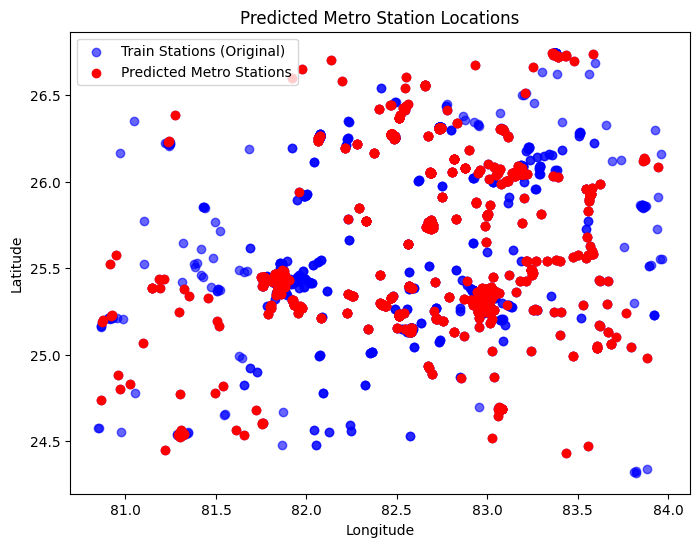

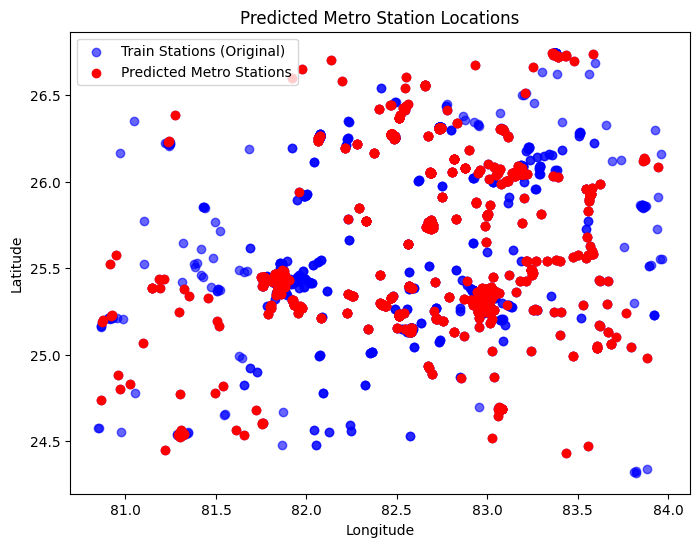

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the train and test data
train_data = pd.read_csv('updated_data_train.csv')
test_data = pd.read_csv('updated_data.csv')

# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        # Compute the absolute difference in population
        population_diff = abs(train_coords['population'].iloc[i] + train_coords['population'].iloc[neighbors[j]])

        # Add the edge with the population difference as weight
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the GCN model with approximately 10 layers for binary classification
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 64)
        self.conv5 = GCNConv(64, 32)
        self.conv6 = GCNConv(32, 32)
        self.conv7 = GCNConv(32, 16)
        self.conv8 = GCNConv(16, 16)
        self.conv9 = GCNConv(16, 8)
        self.conv10 = GCNConv(8, 1)  # Single output for binary classification

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = torch.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv3(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv4(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv5(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv6(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv7(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv8(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv9(x, edge_index, edge_weight=edge_weight))
        x = torch.sigmoid(self.conv10(x, edge_index, edge_weight=edge_weight))  # Sigmoid activation for binary output
        return x.squeeze()  # Squeeze to make it compatible with BCE loss

# Initialize the model, BCE loss function, and optimizer
model = GCN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare binary target labels (1 for metro station, 0 for non-station)
# For demonstration, using random binary labels. Replace with actual binary target labels.
target = torch.randint(0, 2, (data.num_nodes,), dtype=torch.float)  # Binary labels (0 or 1)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out, target)  # BCE loss
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Post-process: Obtain predictions and convert them to binary classification
# Post-process: Obtain predictions, apply threshold, and convert back to original latitude/longitude scale
model.eval()
predicted_probs = model(data).detach().numpy()
predicted_labels = (predicted_probs > 0.5).astype(int)  # Threshold at 0.5 to get binary labels

# Add the binary column for metro station prediction
train_data['Predicted_Metro_Station'] = predicted_labels

# Extract only the latitude and longitude for inverse scaling
predicted_coords = np.zeros((predicted_labels.shape[0], 3))
predicted_coords[:, :2] = train_coords[['Latitude', 'Longitude']].values
predicted_coords[:, 2] = predicted_labels  # Place binary predictions for scaling

# Inverse transform only the coordinates (Latitude and Longitude)
predicted_coords = scaler.inverse_transform(predicted_coords)
predicted_positions = predicted_coords[predicted_coords[:, 2] == 1, :2]  # Select predicted metro stations

# Plot the original train data and predicted metro stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Plot the original train data and predicted metro stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [4]:
%pip install torch_geometric

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [8]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.0 MB 25.2 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 25.5 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


C:\Users\91935\AppData\Local\Temp\ipykernel_12184\4288390419.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


Epoch 0, Loss: 0.6932710409164429, Accuracy: 49.03%
Epoch 10, Loss: 0.6926732659339905, Accuracy: 51.52%
Epoch 20, Loss: 0.6923121809959412, Accuracy: 51.07%
Epoch 30, Loss: 0.691858172416687, Accuracy: 51.21%
Epoch 40, Loss: 0.6921228170394897, Accuracy: 51.52%
Epoch 50, Loss: 0.6908840537071228, Accuracy: 51.98%
Epoch 60, Loss: 0.6910857558250427, Accuracy: 50.66%
Epoch 70, Loss: 0.6902494430541992, Accuracy: 52.69%
Epoch 80, Loss: 0.6900202631950378, Accuracy: 52.07%
Epoch 90, Loss: 0.6894050240516663, Accuracy: 52.86%
Epoch 100, Loss: 0.6884292364120483, Accuracy: 52.48%
Epoch 110, Loss: 0.6917181611061096, Accuracy: 50.83%
Epoch 120, Loss: 0.6907098889350891, Accuracy: 52.38%
Epoch 130, Loss: 0.6896531581878662, Accuracy: 52.93%
Epoch 140, Loss: 0.6891684532165527, Accuracy: 53.46%
Epoch 150, Loss: 0.690276026725769, Accuracy: 51.95%
Epoch 160, Loss: 0.6888152956962585, Accuracy: 53.24%
Epoch 170, Loss: 0.6879271864891052, Accuracy: 53.27%
Epoch 180, Loss: 0.6871657967567444, Accu

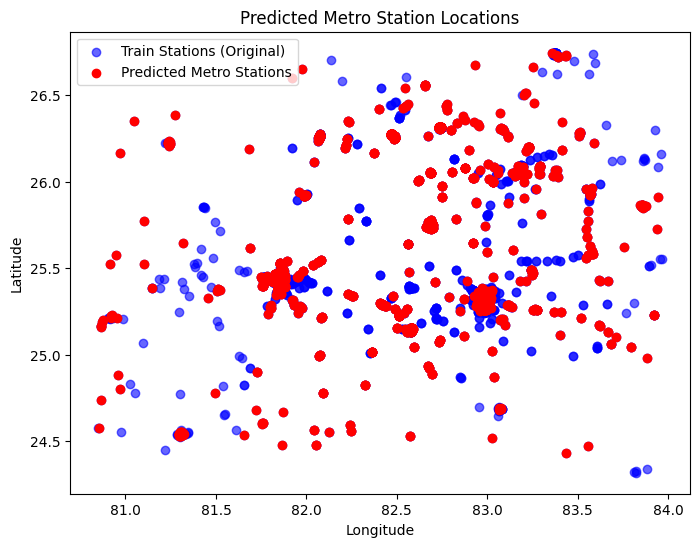

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_data = pd.read_csv("C:\\Users\\91935\\OneDrive\\Documents\\ML\\ML_Project\\data\\refined_dataset\\updated_data_train.csv")
test_data = pd.read_csv("C:\\Users\\91935\\OneDrive\\Documents\\ML\\ML_Project\\data\\test_data\\updated_data.csv")


# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        # Compute the absolute difference in population
        population_diff = abs(train_coords['population'].iloc[i] + train_coords['population'].iloc[neighbors[j]])
        # Add the edge with the population difference as weight
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

def __init__(self):
    super(GCN, self).__init__()
    self.conv1 = GCNConv(3, 16)
    self.conv2 = GCNConv(16, 32)
    self.conv3 = GCNConv(32, 64)
    self.conv4 = GCNConv(64, 64)
    self.conv5 = GCNConv(64, 32)
    self.conv6 = GCNConv(32, 32)
    self.conv7 = GCNConv(32, 16)
    self.conv8 = GCNConv(16, 16)
    self.conv9 = GCNConv(16, 8)
    self.conv10 = GCNConv(8, 1)
    self.conv11 = GCNConv(1, 8)
    self.conv12 = GCNConv(8, 16)
    self.conv13 = GCNConv(16, 32)
    self.conv14 = GCNConv(32, 64)
    self.conv15 = GCNConv(64, 64)
    self.conv16 = GCNConv(64, 32)
    self.conv17 = GCNConv(32, 1)  # Assuming final output layer


    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = torch.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv3(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv4(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv5(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv6(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv7(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv8(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv9(x, edge_index, edge_weight=edge_weight))
        x = torch.sigmoid(self.conv10(x, edge_index, edge_weight=edge_weight))  # Sigmoid for final output
        return x.squeeze()  # Make it compatible with BCE loss


# Initialize the model, BCE loss function, and optimizer
model = GCN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare binary target labels (1 for metro station, 0 for non-station)
# For demonstration, using random binary labels. Replace with actual binary target labels.
target = torch.randint(0, 2, (data.num_nodes,), dtype=torch.float)  # Binary labels (0 or 1)

# Train the model with accuracy tracking
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out, target)  # BCE loss
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        predicted_labels = (out > 0.5).float()  # Convert probabilities to binary (0 or 1)
        correct = (predicted_labels == target).sum().item()
        accuracy = correct / target.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Post-process: Obtain predictions, apply threshold, and convert back to original latitude/longitude scale
model.eval()
predicted_probs = model(data).detach().numpy()
predicted_labels = (predicted_probs > 0.5).astype(int)  # Threshold at 0.5 to get binary labels

# Add the binary column for metro station prediction
train_data['Predicted_Metro_Station'] = predicted_labels

# Extract only the latitude and longitude for inverse scaling
predicted_coords = np.zeros((predicted_labels.shape[0], 3))
predicted_coords[:, :2] = train_coords[['Latitude', 'Longitude']].values
predicted_coords[:, 2] = predicted_labels  # Place binary predictions for scaling

# Inverse transform only the coordinates (Latitude and Longitude)
predicted_coords = scaler.inverse_transform(predicted_coords)
predicted_positions = predicted_coords[predicted_coords[:, 2] == 1, :2]  # Select predicted metro stations

# Plot the original train data and predicted metro stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


          Amenity Type                                             Name  \
0                  bar                                       mohini bar   
1                  bar                                      The Gem Bar   
2                  bar                                OMG Bar & Kitchen   
3                  bar                                         My Love    
4                  bar                                        Sam's bar   
...                ...                                              ...   
1274  place_of_worship  Dargah Hazrat Baba Rangeele Shah Chisthi Nizami   
1275  place_of_worship                         Sindhi Sat Sangat Darbar   
1276       public_bath                                      Deluxe Bath   
1277       public_bath                                      Deluxe Bath   
1278   public_building                                              NIC   

       Latitude  Longitude                               road  \
0     28.633277  77.223876        

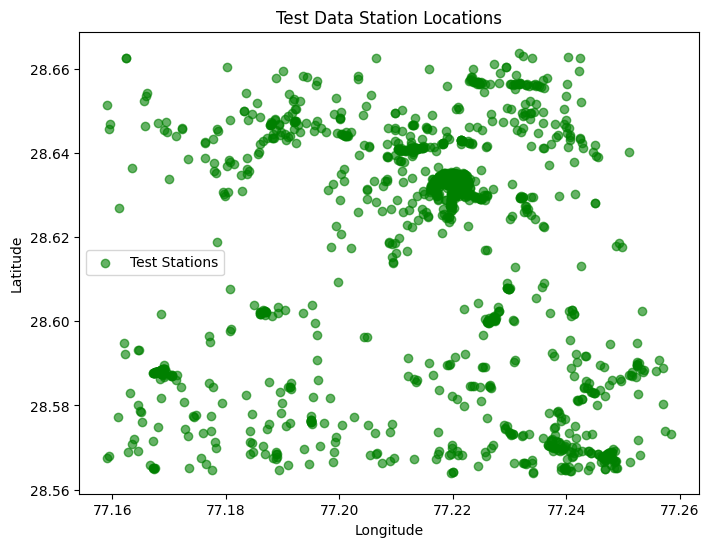

In [ ]:
# Load the test data
test_data = pd.read_csv('updated_data.csv')

print(test_data)
# Extract necessary columns (Latitude, Longitude, Population)
test_coords = test_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude and Longitude using MinMaxScaler (use the same scaler from the training data)
# test_coords[['Latitude', 'Longitude']] = scaler.transform(
#     test_coords[['Latitude', 'Longitude']]
# )

# Plot the original test data
plt.figure(figsize=(8, 6))
plt.scatter(test_coords['Longitude'], test_coords['Latitude'], color='green', label='Test Stations', alpha=0.6)
plt.title('Test Data Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


          Amenity Type                                       Name   Latitude  \
0                  bar                                      jyoti  26.070360   
1                  bar                                      Lassi  25.429981   
2                  bar                                 Beer “Bar”  25.308876   
3                  bar                                   Beer Bar  25.309253   
4                  bar                                    Sol Bar  25.338722   
...                ...                                        ...        ...   
4172  place_of_worship                               Shiva Mandir  25.308244   
4173  place_of_worship                             Sita Mata Dham  25.771454   
4174  place_of_worship  Sri Mahavir Ji Mandir Temple Bari Bagahin  25.245697   
4175  place_of_worship                                Shiv Temple  25.638992   
4176  place_of_worship                         Chaura Mata Mandir  25.638231   

      Longitude                       r

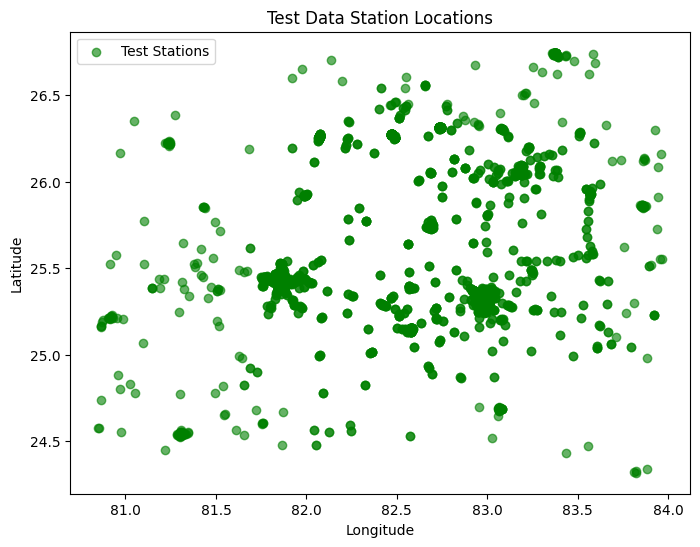

In [ ]:
# Load the test data
test_data = pd.read_csv('updated_data_train.csv')

print(test_data)
# Extract necessary columns (Latitude, Longitude, Population)
test_coords = test_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude and Longitude using MinMaxScaler (use the same scaler from the training data)
# test_coords[['Latitude', 'Longitude']] = scaler.transform(
#     test_coords[['Latitude', 'Longitude']]
# )

# Plot the original test data
plt.figure(figsize=(8, 6))
plt.scatter(test_coords['Longitude'], test_coords['Latitude'], color='green', label='Test Stations', alpha=0.6)
plt.title('Test Data Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


<ipython-input-7-6c4dad8d3a70>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


Epoch 0, Loss: 0.6931801438331604
Epoch 10, Loss: 0.6927403211593628
Epoch 20, Loss: 0.6918944120407104
Epoch 30, Loss: 0.6919998526573181
Epoch 40, Loss: 0.6906415224075317
Epoch 50, Loss: 0.690077543258667
Epoch 60, Loss: 0.689837634563446
Epoch 70, Loss: 0.6884298324584961
Epoch 80, Loss: 0.688762903213501
Epoch 90, Loss: 0.690863847732544
Epoch 100, Loss: 0.6876622438430786
Epoch 110, Loss: 0.6862189769744873
Epoch 120, Loss: 0.6856507062911987
Epoch 130, Loss: 0.6855604648590088
Epoch 140, Loss: 0.6836872100830078
Epoch 150, Loss: 0.6848951578140259
Epoch 160, Loss: 0.6841977834701538
Epoch 170, Loss: 0.6814849376678467
Epoch 180, Loss: 0.6832538843154907
Epoch 190, Loss: 0.6805757284164429
Epoch 200, Loss: 0.6809197664260864
Epoch 210, Loss: 0.6807847023010254
Epoch 220, Loss: 0.6772475838661194
Epoch 230, Loss: 0.6815952658653259
Epoch 240, Loss: 0.6798799633979797
Epoch 250, Loss: 0.6742509603500366
Epoch 260, Loss: 0.6803582310676575
Epoch 270, Loss: 0.677144467830658
Epoch 28

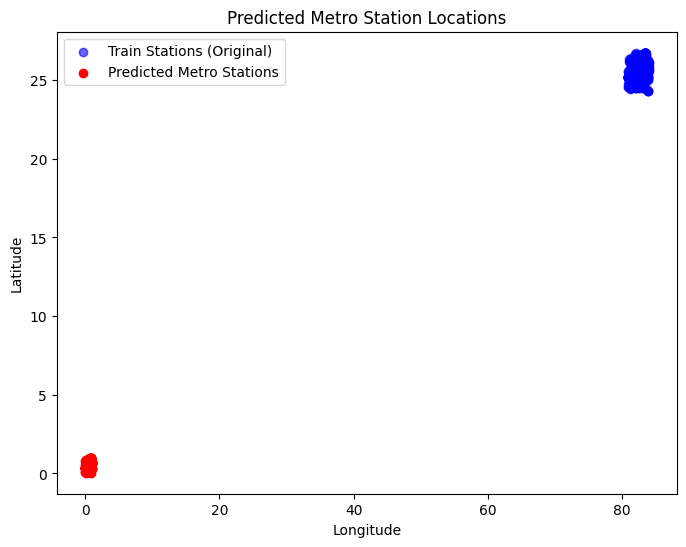

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the train and test data
train_data = pd.read_csv('updated_data_train.csv')
test_data = pd.read_csv('updated_data.csv')

# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        # Compute the absolute difference in population
        population_diff = abs(train_coords['population'].iloc[i] + train_coords['population'].iloc[neighbors[j]])

        # Add the edge with the population difference as weight
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the GCN model for binary classification
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 64)
        self.conv5 = GCNConv(64, 32)
        self.conv6 = GCNConv(32, 32)
        self.conv7 = GCNConv(32, 16)
        self.conv8 = GCNConv(16, 16)
        self.conv9 = GCNConv(16, 8)
        self.conv10 = GCNConv(8, 1)  # Output layer for binary classification

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = torch.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv3(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv4(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv5(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv6(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv7(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv8(x, edge_index, edge_weight=edge_weight))
        x = torch.relu(self.conv9(x, edge_index, edge_weight=edge_weight))
        x = torch.sigmoid(self.conv10(x, edge_index, edge_weight=edge_weight))  # Sigmoid activation for binary output
        return x.squeeze()  # Remove single-dimensional entries from the shape

# Initialize the model, BCE loss function, and optimizer
model = GCN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare target labels (binary: 1 for metro station, 0 for non-station)
# Example: create random binary labels as a placeholder. Replace with actual labels.
target = torch.randint(0, 2, (data.num_nodes,), dtype=torch.float)  # Binary labels (0 or 1)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out, target)  # BCE loss
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Post-process: Obtain predictions
model.eval()
predicted_probs = model(data).detach().numpy()
predicted_labels = (predicted_probs > 0.5).astype(int)  # Binarize probabilities to get labels (0 or 1)

# Plot the original train data and predicted stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
predicted_positions = train_coords[['Longitude', 'Latitude']].iloc[predicted_labels == 1]
plt.scatter(predicted_positions['Longitude'], predicted_positions['Latitude'], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


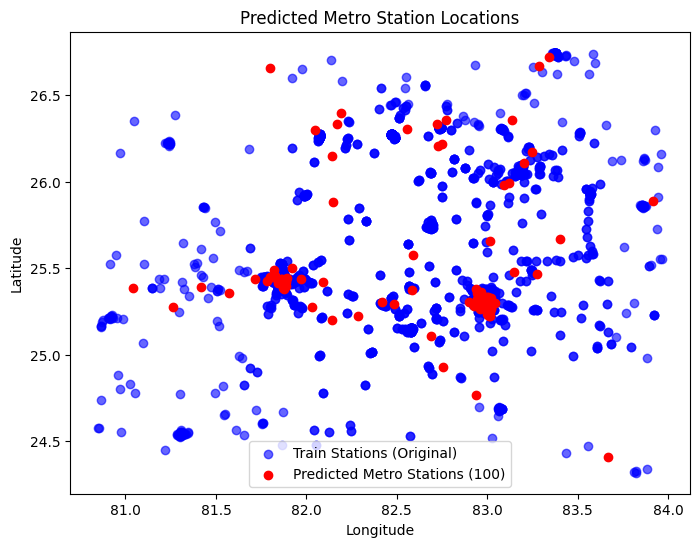

In [ ]:
import random

# After predicting all the stations:
predicted_positions = model(data).detach().numpy()

# Inverse transform the predictions using the same scaler (for Lat, Long)
predicted_positions = scaler.inverse_transform(
    np.hstack((predicted_positions, np.zeros((predicted_positions.shape[0], 1))))
)[:, :2]  # Only take Lat and Long

# Clip the latitude values to stay within a valid range (Assume 0 to 50)
predicted_positions[:, 0] = np.clip(predicted_positions[:, 0], 0, 50)  # Latitude range

# Step 1: Randomly select 100 stations from the predicted positions
if predicted_positions.shape[0] > 100:
    sampled_positions = random.sample(predicted_positions.tolist(), 100)
    sampled_positions = np.array(sampled_positions)
else:
    sampled_positions = predicted_positions  # If less than 100 predicted, use all

# Step 2: Plot only the selected 100 stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(sampled_positions[:, 1], sampled_positions[:, 0], color='red', label='Predicted Metro Stations (100)')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


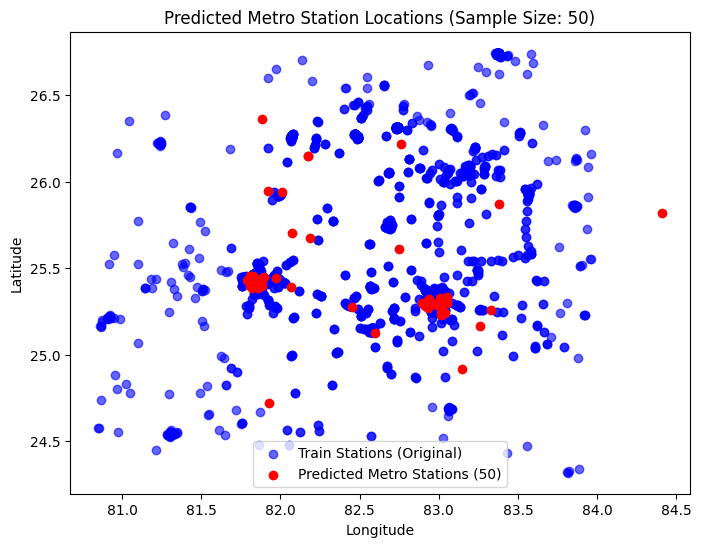

Sample Size: 50, Accuracy Score (MSE): N/A


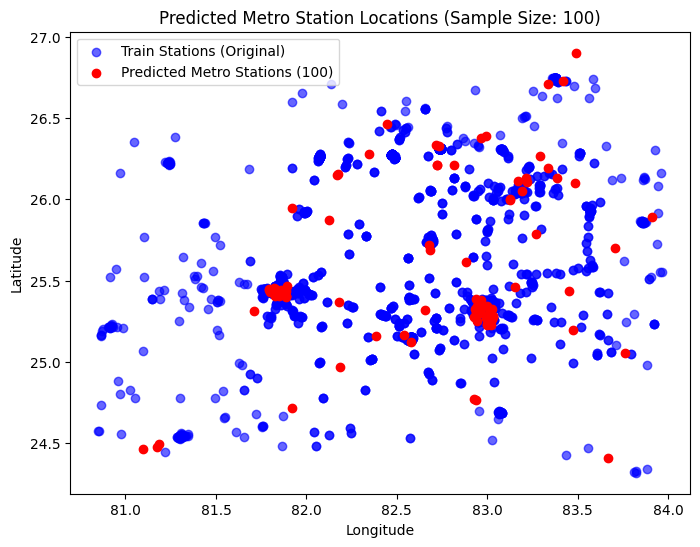

Sample Size: 100, Accuracy Score (MSE): N/A


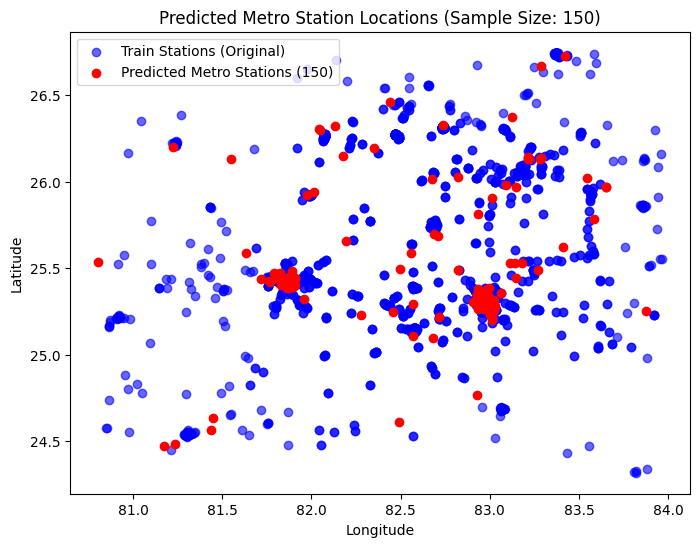

Sample Size: 150, Accuracy Score (MSE): N/A


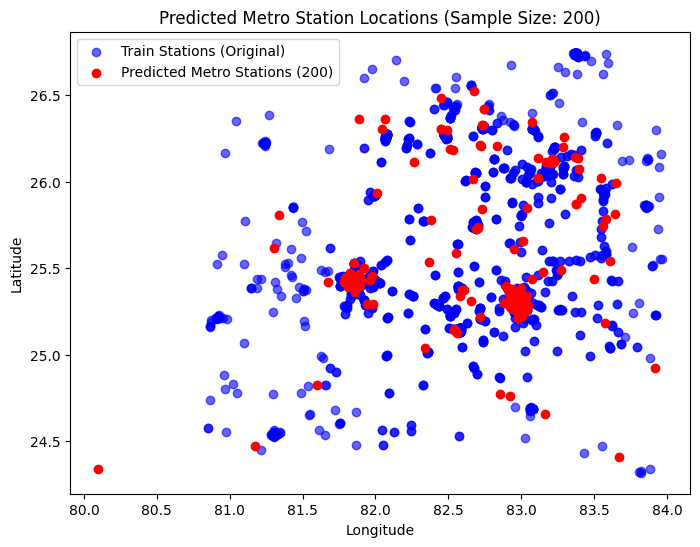

Sample Size: 200, Accuracy Score (MSE): N/A


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume `model`, `scaler`, `data`, and `train_data` are defined and initialized.

# Predict positions
predicted_positions = model(data).detach().numpy()

# Inverse transform predictions for Latitude and Longitude
predicted_positions = scaler.inverse_transform(
    np.hstack((predicted_positions, np.zeros((predicted_positions.shape[0], 1))))
)[:, :2]  # Only take Lat and Long

# Clip Latitude values to a valid range
predicted_positions[:, 0] = np.clip(predicted_positions[:, 0], 0, 50)

# List of different numbers of points to sample for analysis
sample_sizes = [50, 100, 150, 200]  # Example sample sizes

# Loop over each sample size and calculate accuracy
for sample_size in sample_sizes:
    if predicted_positions.shape[0] > sample_size:
        sampled_positions = random.sample(predicted_positions.tolist(), sample_size)
        sampled_positions = np.array(sampled_positions)
    else:
        sampled_positions = predicted_positions  # Use all if fewer than sample size

    # Accuracy Score Calculation (Assuming `true_positions` is defined for comparison)
    # Here, `true_positions` should contain actual Lat and Long values to compare.
    accuracy_score = mean_squared_error(true_positions[:sample_size], sampled_positions) if 'true_positions' in locals() else 'N/A'

    # Plot the selected number of stations
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
    plt.scatter(sampled_positions[:, 1], sampled_positions[:, 0], color='red', label=f'Predicted Metro Stations ({sample_size})')
    plt.title(f'Predicted Metro Station Locations (Sample Size: {sample_size})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

    # Print accuracy score
    print(f"Sample Size: {sample_size}, Accuracy Score (MSE): {accuracy_score}")


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume `model`, `scaler`, `data`, `train_data`, and `true_positions` are defined and initialized.

# Predict positions
predicted_positions = model(data).detach().numpy()

# Inverse transform predictions for Latitude and Longitude
predicted_positions = scaler.inverse_transform(
    np.hstack((predicted_positions, np.zeros((predicted_positions.shape[0], 1))))
)[:, :2]  # Only take Lat and Long

# Clip Latitude values to a valid range
predicted_positions[:, 0] = np.clip(predicted_positions[:, 0], 0, 50)

# List of different numbers of points to sample for analysis
sample_sizes = [50, 100, 150, 200]  # Example sample sizes

# Loop over each sample size and calculate accuracy
for sample_size in sample_sizes:
    if predicted_positions.shape[0] > sample_size:
        sampled_indices = random.sample(range(predicted_positions.shape[0]), sample_size)
        sampled_positions = predicted_positions[sampled_indices]
        sampled_true_positions = true_positions[sampled_indices]  # Select corresponding true positions
    else:
        sampled_positions = predicted_positions  # Use all if fewer than sample size
        sampled_true_positions = true_positions  # Use all true positions

    # Calculate accuracy (MSE)
    accuracy_score = mean_squared_error(sampled_true_positions, sampled_positions)

    # Plot the selected number of stations
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
    plt.scatter(sampled_positions[:, 1], sampled_positions[:, 0], color='red', label=f'Predicted Metro Stations ({sample_size})')
    plt.title(f'Predicted Metro Station Locations (Sample Size: {sample_size})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

    # Print accuracy score
    print(f"Sample Size: {sample_size}, Accuracy Score (MSE): {accuracy_score}")


NameError: name 'true_positions' is not defined

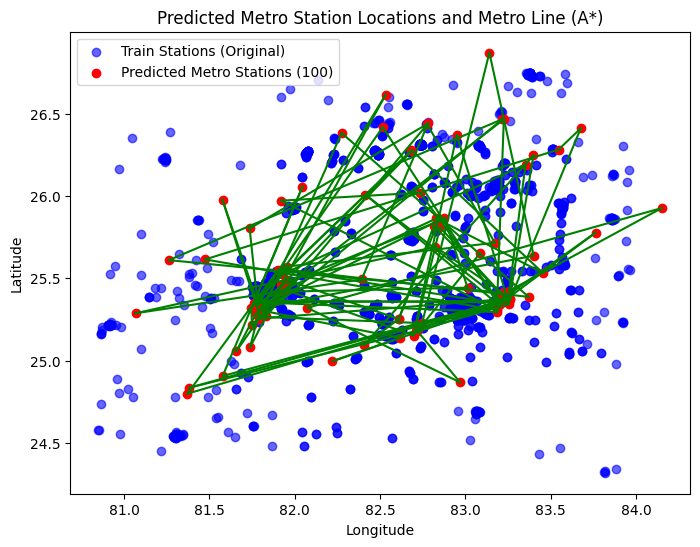

In [ ]:
import heapq
import math

# Heuristic function: Euclidean distance between two nodes
def heuristic(node1, node2):
    return math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2)

# A* algorithm to find the path between two nodes
def astar(start, goal, graph):
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct the path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path

        for neighbor in graph[current]:
            tentative_g_score = g_score[current] + heuristic(current, neighbor)
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return []  # Return an empty path if no path is found

# Build a graph for A* pathfinding from the selected 100 stations
def build_graph(stations):
    graph = {}
    for i, station1 in enumerate(stations):
        graph[tuple(station1)] = []
        for j, station2 in enumerate(stations):
            if i != j:
                graph[tuple(station1)].append(tuple(station2))
    return graph

# After random selection of 100 stations:
if predicted_positions.shape[0] > 100:
    sampled_positions = random.sample(predicted_positions.tolist(), 100)
    sampled_positions = np.array(sampled_positions)
else:
    sampled_positions = predicted_positions  # If less than 100 predicted, use all

# Step 1: Build the graph from the selected 100 stations
graph = build_graph(sampled_positions)

# Step 2: Connect all stations using A* algorithm and store the paths
metro_lines = []
for i in range(len(sampled_positions) - 1):
    start_station = tuple(sampled_positions[i])
    end_station = tuple(sampled_positions[i + 1])
    path = astar(start_station, end_station, graph)
    metro_lines.append(path)

# Step 3: Plot the metro stations and the A* metro lines
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(sampled_positions[:, 1], sampled_positions[:, 0], color='red', label='Predicted Metro Stations (100)')

# Plotting metro lines
for path in metro_lines:
    if path:  # Ensure the path is valid
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color='green',)

plt.title('Predicted Metro Station Locations and Metro Line (A*)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


C:\Users\91935\AppData\Local\Temp\ipykernel_12184\654377118.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(


Epoch 0, Loss: 0.6933411955833435, Accuracy: 49.87%
Epoch 10, Loss: 0.6926029324531555, Accuracy: 50.80%
Epoch 20, Loss: 0.691718578338623, Accuracy: 52.26%
Epoch 30, Loss: 0.6909165382385254, Accuracy: 52.60%
Epoch 40, Loss: 0.6901963353157043, Accuracy: 52.38%
Epoch 50, Loss: 0.6893398761749268, Accuracy: 53.03%
Epoch 60, Loss: 0.6884379982948303, Accuracy: 53.48%
Epoch 70, Loss: 0.6871864795684814, Accuracy: 54.11%
Epoch 80, Loss: 0.6859229207038879, Accuracy: 54.35%
Epoch 90, Loss: 0.6847374439239502, Accuracy: 55.21%
Epoch 100, Loss: 0.685161292552948, Accuracy: 54.78%
Epoch 110, Loss: 0.6837511658668518, Accuracy: 54.99%
Epoch 120, Loss: 0.6827936768531799, Accuracy: 55.18%
Epoch 130, Loss: 0.6833369135856628, Accuracy: 54.51%
Epoch 140, Loss: 0.6814858913421631, Accuracy: 55.42%
Epoch 150, Loss: 0.6806605458259583, Accuracy: 55.78%
Epoch 160, Loss: 0.6796444654464722, Accuracy: 55.37%
Epoch 170, Loss: 0.6790125370025635, Accuracy: 55.30%
Epoch 180, Loss: 0.6781608462333679, Accu

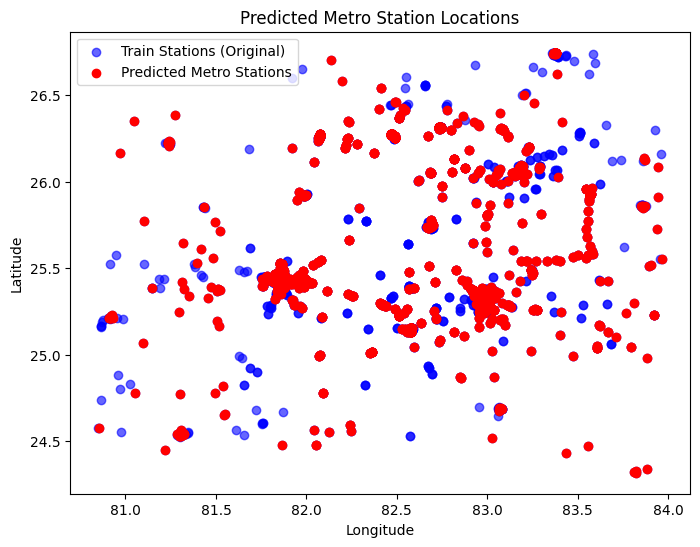

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the data
train_data = pd.read_csv("C:\\Users\\91935\\OneDrive\\Documents\\ML\\ML_Project\\data\\refined_dataset\\updated_data_train.csv")

# Extract necessary columns (Latitude, Longitude, Population)
train_coords = train_data[['Latitude', 'Longitude', 'population']]

# Normalize Latitude, Longitude, and Population using MinMaxScaler
scaler = MinMaxScaler()
train_coords[['Latitude', 'Longitude', 'population']] = scaler.fit_transform(
    train_coords[['Latitude', 'Longitude', 'population']]
)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in train_coords.iterrows():
    G.add_node(idx, latitude=row['Latitude'], longitude=row['Longitude'], population=row['population'])

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(train_coords[['Latitude', 'Longitude']])
distances, indices = nbrs.kneighbors(train_coords[['Latitude', 'Longitude']])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        G.add_edge(i, neighbors[j])  # Add unweighted edges

# Prepare the node features and edges for PyTorch Geometric
node_features = []
for node in G.nodes(data=True):
    node_features.append([node[1]['latitude'], node[1]['longitude'], node[1]['population']])

edge_index = []
for edge in G.edges():
    edge_index.append([edge[0], edge[1]])

# Convert node features and edge index to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index)

# Define the GCN model
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 32)
        self.conv5 = GCNConv(32, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        x = torch.relu(self.conv3(x, edge_index))
        x = torch.relu(self.conv4(x, edge_index))
        x = torch.sigmoid(self.conv5(x, edge_index))  # Sigmoid for binary classification
        return x.squeeze()

# Initialize the model, BCE loss function, and optimizer
model = GCN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Prepare binary target labels (1 for metro station, 0 for non-station)
# For demonstration, using random binary labels. Replace with actual binary target labels.
target = torch.randint(0, 2, (data.num_nodes,), dtype=torch.float)  # Binary labels (0 or 1)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out, target)  # Compute BCE loss
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        predicted_labels = (out > 0.5).float()  # Convert probabilities to binary (0 or 1)
        correct = (predicted_labels == target).sum().item()
        accuracy = correct / target.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Post-process: Obtain predictions, apply threshold, and convert back to original latitude/longitude scale
model.eval()
predicted_probs = model(data).detach().numpy()
predicted_labels = (predicted_probs > 0.5).astype(int)  # Threshold at 0.5 to get binary labels

# Add the binary column for metro station prediction
train_data['Predicted_Metro_Station'] = predicted_labels

# Extract only the latitude and longitude for inverse scaling
predicted_coords = np.zeros((predicted_labels.shape[0], 3))
predicted_coords[:, :2] = train_coords[['Latitude', 'Longitude']].values
predicted_coords[:, 2] = predicted_labels  # Place binary predictions for scaling

# Inverse transform only the coordinates (Latitude and Longitude)
predicted_coords = scaler.inverse_transform(predicted_coords)
predicted_positions = predicted_coords[predicted_coords[:, 2] == 1, :2]  # Select predicted metro stations

# Plot the original train data and predicted metro stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Train Stations (Original)', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Predicted Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Load the train data

train_data = pd.read_csv("C:\\Users\\91935\\OneDrive\\Documents\\ML\\ML_Project\\data\\refined_dataset\\updated_data_train.csv")

# Encode categorical string columns using OneHotEncoder
string_columns = train_data.select_dtypes(include=['object']).columns
if len(string_columns) > 0:
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
    encoded_columns = encoder.fit_transform(train_data[string_columns])
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(string_columns))
    train_data = pd.concat([train_data.drop(columns=string_columns), encoded_df], axis=1)

# Extract necessary columns (Latitude, Longitude, Population, and any encoded features)
train_coords = train_data[['Latitude', 'Longitude', 'population'] + list(encoded_df.columns)]

# Normalize all features using MinMaxScaler
scaler = MinMaxScaler()
train_coords_normalized = scaler.fit_transform(train_coords)

# Create the graph (G) for the training dataset
G = nx.Graph()
for idx, row in enumerate(train_coords_normalized):
    G.add_node(idx, features=row)

# Use Nearest Neighbors to add edges based on geographic proximity
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(train_coords_normalized[:, :2])
distances, indices = nbrs.kneighbors(train_coords_normalized[:, :2])
for i, neighbors in enumerate(indices):
    for j in range(1, len(neighbors)):
        population_diff = abs(train_coords_normalized[i, 2] - train_coords_normalized[neighbors[j], 2])
        G.add_edge(i, neighbors[j], weight=population_diff)

# Prepare the node features and edges for PyTorch Geometric
node_features = np.array([G.nodes[node]['features'] for node in G.nodes()])
edge_index = []
edge_weight = []
for edge in G.edges(data=True):
    edge_index.append([edge[0], edge[1]])
    edge_weight.append(edge[2]['weight'])

# Convert node features, edge index, and edge weights to torch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_weight = torch.tensor(edge_weight, dtype=torch.float)

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_weight=edge_weight)

# Define the improved GCN model with dropout and fewer layers to prevent overfitting
# Define the extended GCN model with approximately 20 layers
class ExtendedGCN(nn.Module):
    def __init__(self, input_dim):
        super(ExtendedGCN, self).__init__()
        # Layer definitions
        self.conv1 = GCNConv(input_dim, 32)
        self.conv2 = GCNConv(32, 64)
        self.conv3 = GCNConv(64, 128)
        self.conv4 = GCNConv(128, 128)
        self.conv5 = GCNConv(128, 128)
        self.conv6 = GCNConv(128, 64)
        self.conv7 = GCNConv(64, 64)
        self.conv8 = GCNConv(64, 32)
        self.conv9 = GCNConv(32, 32)
        self.conv10 = GCNConv(32, 1)
        
        self.dropout = nn.Dropout(0.3)  # Dropout to reduce overfitting

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = torch.relu(self.conv1(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv2(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv3(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv4(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv5(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv6(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv7(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv8(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv9(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
        x = torch.relu(self.conv10(x, edge_index, edge_weight=edge_weight))
        x = self.dropout(x)
       
        x = torch.sigmoid(self.conv20(x, edge_index, edge_weight=edge_weight))
        return x.squeeze()

# Initialize the extended model, BCE loss function, and optimizer
extended_model = ExtendedGCN(input_dim=x.size(1))
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(extended_model.parameters(), lr=0.01)

# Train the extended model
epochs = 300
for epoch in range(epochs):
    extended_model.train()
    optimizer.zero_grad()
    out = extended_model(data)  # Forward pass
    loss = criterion(out, target)  # BCE loss
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        predicted_labels = (out > 0.5).float()  # Convert probabilities to binary (0 or 1)
        correct = (predicted_labels == target).sum().item()
        accuracy = correct / target.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Post-process: Obtain predictions
extended_model.eval()
predicted_probs = extended_model(data).detach().numpy()
predicted_labels = (predicted_probs > 0.5).astype(int)

# Add the binary column for metro station prediction
train_data['Predicted_Metro_Station'] = predicted_labels
print(train_data[['Latitude', 'Longitude', 'Predicted_Metro_Station']].head())


Epoch 0, Loss: 0.6931504607200623, Accuracy: 49.56%
Epoch 10, Loss: 0.6930757761001587, Accuracy: 50.54%
Epoch 20, Loss: 0.693120002746582, Accuracy: 50.32%
Epoch 30, Loss: 0.6930269598960876, Accuracy: 50.44%
Epoch 40, Loss: 0.6931366920471191, Accuracy: 50.51%
Epoch 50, Loss: 0.6928879022598267, Accuracy: 50.51%
Epoch 60, Loss: 0.6908830404281616, Accuracy: 51.47%
Epoch 70, Loss: 0.6913425326347351, Accuracy: 50.85%
Epoch 80, Loss: 0.6864520907402039, Accuracy: 52.36%
Epoch 90, Loss: 0.6897109746932983, Accuracy: 51.76%
Epoch 100, Loss: 0.6843627691268921, Accuracy: 53.00%
Epoch 110, Loss: 0.6845223307609558, Accuracy: 52.91%
Epoch 120, Loss: 0.6708515286445618, Accuracy: 54.35%
Epoch 130, Loss: 0.6764886975288391, Accuracy: 53.89%
Epoch 140, Loss: 0.6717085838317871, Accuracy: 54.06%
Epoch 150, Loss: 0.6728725433349609, Accuracy: 54.32%
Epoch 160, Loss: 0.6885349750518799, Accuracy: 54.51%
Epoch 170, Loss: 0.6684685349464417, Accuracy: 54.44%
Epoch 180, Loss: 0.666526734828949, Accu

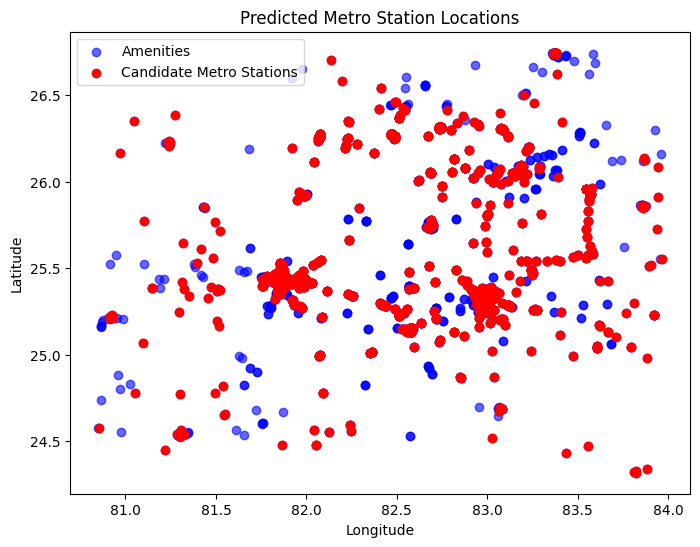

In [22]:

# Plot the original train data and predicted metro stations
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='blue', label='Amenities', alpha=0.6)
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='red', label='Candidate Metro Stations')
plt.title('Predicted Metro Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()